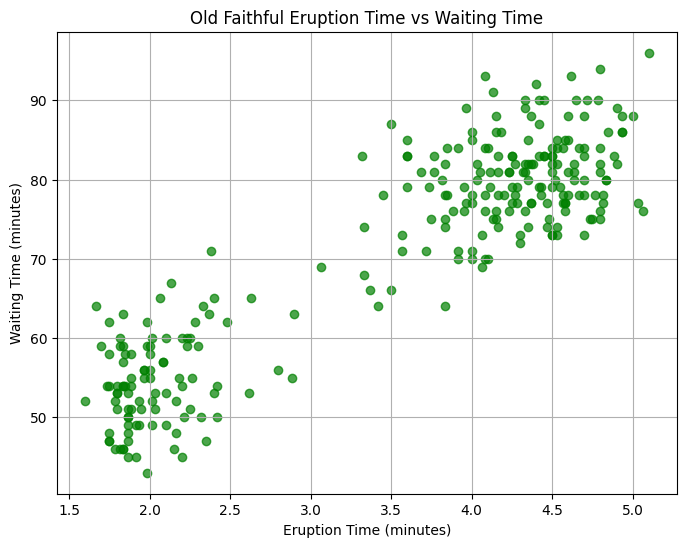

In [5]:
#1.a
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'https://raw.githubusercontent.com/Sumanth457/is7332025/refs/heads/main/data-mining-project-repo/HW3/faithful.csv'
df = pd.read_csv(file_path)

df.head()

plt.figure(figsize=(8,6))
plt.scatter(df['eruptions'], df['waiting'], alpha=0.7, color='green')
plt.title('Old Faithful Eruption Time vs Waiting Time')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.grid(True)
plt.show()



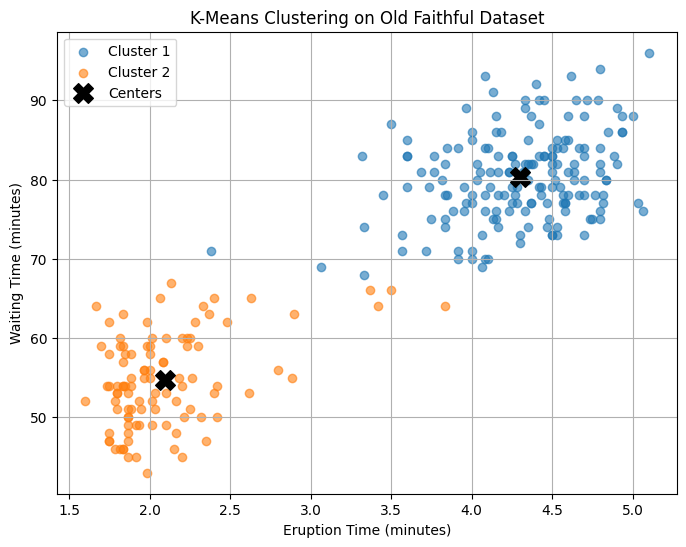

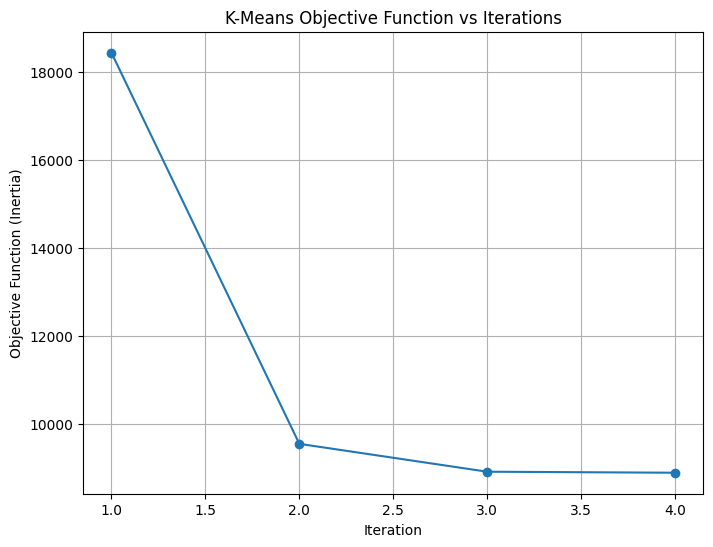

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

file_path = 'https://raw.githubusercontent.com/Sumanth457/is7332025/refs/heads/main/data-mining-project-repo/HW3/faithful.csv'
df = pd.read_csv(file_path)

#2.a
class KMeansScratch:
    def __init__(self, n_clusters=2, max_iters=100, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        np.random.seed(42)
        random_idx = np.random.permutation(X.shape[0])
        self.centers = X[random_idx[:self.n_clusters]]

        self.inertia_ = []

        for iteration in range(self.max_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2)
            self.labels = np.argmin(distances, axis=1)

            new_centers = np.array([X[self.labels == i].mean(axis=0) for i in range(self.n_clusters)])

            inertia = np.sum((X - self.centers[self.labels])**2)
            self.inertia_.append(inertia)

            if np.all(np.abs(new_centers - self.centers) < self.tol):
                break

            self.centers = new_centers

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centers, axis=2)
        return np.argmin(distances, axis=1)

X = df[['eruptions', 'waiting']].values

kmeans = KMeansScratch(n_clusters=2)
kmeans.fit(X)

labels = kmeans.labels
centers = kmeans.centers

#2.b
plt.figure(figsize=(8,6))
for i in range(2):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Cluster {i+1}', alpha=0.6)

plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centers')
plt.title('K-Means Clustering on Old Faithful Dataset')
plt.xlabel('Eruption Time (minutes)')
plt.ylabel('Waiting Time (minutes)')
plt.legend()
plt.grid(True)
plt.show()

#2.c
plt.figure(figsize=(8,6))
plt.plot(range(1, len(kmeans.inertia_)+1), kmeans.inertia_, marker='o')
plt.title('K-Means Objective Function vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function (Inertia)')
plt.grid(True)
plt.show()
